In [1]:
#for manipulating data
import pandas as pd
#for numerical manipulation
import numpy as np
#for splitting dataset
from sklearn.model_selection import train_test_split
#for doing linear regression
from sklearn.linear_model import LinearRegression
#for plotting
import matplotlib.pyplot as plt

#does carat size affect the price of a diamond.

In [5]:
df = pd.read_csv("diamonds.csv")

In [6]:
df.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
df.shape

(53940, 11)

In [8]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [9]:
df.describe()
#on the "count", we found some values missing....
#on std....the large variability also suggests outliers
#on max, it definitely tells us that something is
#outliers

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


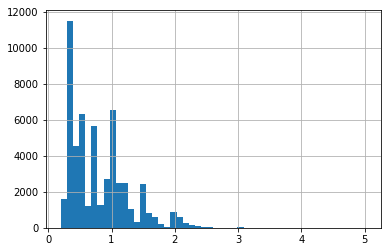

In [10]:
df['carat'].hist(bins=50)
#check outliers
#it seems that the data is a bit skewed to the left
#confirms outliers

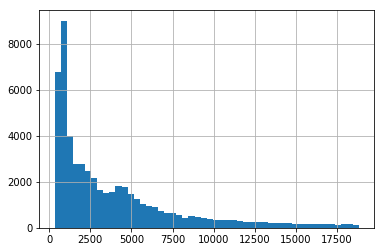

In [11]:
df['price'].hist(bins=50)
#check outliers
#it seems that this data is also a bit skewed....
#confirms outliers

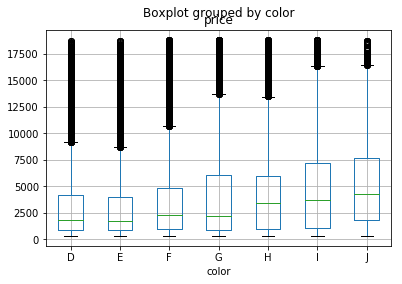

In [14]:
df.boxplot(column='price', by = "color")
#let's do some simple analysis to check
#any correlation

In [15]:
df.isna().sum()
#found no missing values

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [16]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [17]:
from sklearn.preprocessing import LabelEncoder
non_numeric_columns = ['cut','color','clarity']
le = LabelEncoder()
for each_column in non_numeric_columns:
    df[each_column] = le.fit_transform(df[each_column])
df.dtypes 

Unnamed: 0      int64
carat         float64
cut             int64
color           int64
clarity         int64
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [18]:
df.head(1)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43


In [19]:
df['carat_log'] = np.log(df['carat'])

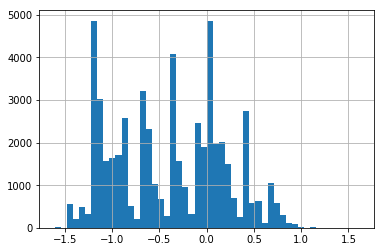

In [20]:
df['carat_log'].hist(bins=50)
#looking good! no outliers

In [21]:
df['price_log'] = np.log(df['price'])

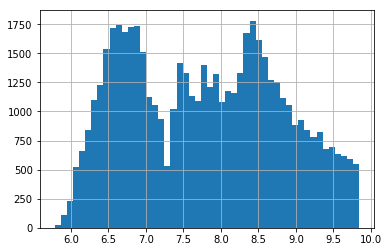

In [22]:
df['price_log'].hist(bins=50)
#looking good!

In [23]:
X = df[['carat_log']]

In [24]:
X.head(1)

,carat_log
0,-1.469676


In [25]:
y = df['price_log']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
X_train.shape

(37758, 1)

In [28]:
X_test.shape

(16182, 1)

In [29]:
model = LinearRegression(n_jobs=2)

In [30]:
model.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=2, normalize=False)

In [31]:
model.score(X_test, y_test)
#check our model score with testing set

0.9328788578003768

In [32]:
y_pred = model.predict(X_test)
#predict y with the testing set, so we can plot

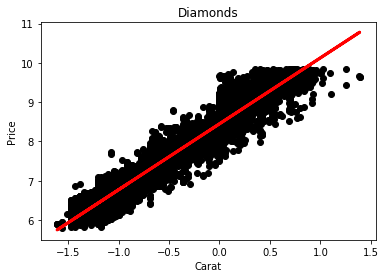

In [33]:
plt.scatter(X_test, y_test, color="black")  #first, plot the X_test and y_test values
plt.title("Diamonds")
plt.xlabel("Carat")
plt.ylabel("Price")

plt.plot(X_test, y_pred, color='red',linewidth=3)

plt.show()

In [34]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.2048007233236352
MSE: 0.06865339666656604
RMSE: 0.2620179319561278


In [ ]:
#so it is safe to say that variable x which is the carat of the diamond contributes to the price of the diamond. the Higher the carat the higher the price.